# Assignment 2: Working with health data from wearables
## Data

In this assigment you will use the [Daily Sports and Activities](http://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities) dataset from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). This dataset contains motion sensor data of 19 daily and sports activities (walking, running, rowing, jumping,...), each performed by 8 subjects in their own style for 5 minutes. Five Xsens MTx units are used on the torso, (right and left) arms, and (right and left) legs.

----

## Objectives

- Understand time-series health data
- Perform pre-processing and visualisation on time-series data
- Extract features from time-series data
- Train a classifier to predict the activity the users are doing

----



# Exercise 1


## Exercise 1 Instructions


Load, analyse and visualise the (temporal) data of the different sensors for subject 7 (p7). Compare walking on a treadmill with a speed of 4 km/h on a flat surface (a10) and running on a treadmill with a speed of 8 km/h (a12). Do you see any difference? Comment.

## Exercise 1 Solution

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [5]:
base_path = './data/'

In [6]:
column_names = [
    "T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
    "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
    "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
    "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
    "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"
]
sensors = ['xacc', 'yacc', 'zacc', 'xgyro', 'ygyro', 'zgyro', 'xmag', 'ymag', 'zmag']
prefix_map = {'T': 'Torso', 'RA': 'Right Arm' , 'LA': 'Left Arm', 'RL' : 'Right Leg', 'LL': 'Left Leg'}
sensor_type_map =  {'acc': 'Accelerometer', 'gyro': 'Gyroscope' , 'mag': 'Magnetometer'}
def get_full_sensor_name(shortname):
    return shortname[0] + '-' + sensor_type_map[shortname[1:]]

In [4]:
def load_activity_data(activity_folder, subject_folder, base_path='/content/drive/My Drive/_Universität_HPI/Semester 6/DSxHealth/Assignments/Assignment 2/data'):
    """Load data for a specific activity and subject, with column names."""
    activity_path = os.path.join(base_path, activity_folder, subject_folder)
    segments = []
    for segment_file in sorted(os.listdir(activity_path)):
        segment_path = os.path.join(activity_path, segment_file)
        segment_data = pd.read_csv(segment_path, header=None, names=column_names)
        segments.append(segment_data)
    return pd.concat(segments, ignore_index=True)

# Loading the data for walking (a10) and running (a12) for subject 7 (p7)
walking_data = load_activity_data('a10', 'p7', base_path=base_path)
running_data = load_activity_data('a12', 'p7', base_path=base_path)

In [5]:
walking_data

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,9.3105,0.587000,-1.22880,-0.243650,-1.10660,0.037636,-0.72318,0.12456,-0.70206,5.0612,...,0.076493,-9.8361,-0.18946,-1.565400,-0.407760,0.37506,1.13070,1.02110,0.36735,-0.165180
1,12.0460,-0.086358,0.52566,-0.179740,0.85106,0.270410,-0.72236,0.13881,-0.69857,5.3809,...,0.081997,-9.1952,-2.43550,-0.948150,-0.036454,0.27783,0.87566,1.04600,0.34339,-0.189730
2,9.2470,-2.045200,10.73400,-1.551400,-0.60079,0.369790,-0.71560,0.16523,-0.70152,4.9954,...,0.075714,-8.5541,0.87487,-2.190800,-0.636590,0.42847,0.99528,1.06150,0.33070,-0.197990
3,7.4230,-2.820000,2.47950,-0.806630,0.22937,0.226170,-0.71067,0.19402,-0.70193,4.9443,...,0.019514,-9.1001,0.52867,-0.714470,-1.499400,0.35843,0.87873,1.07960,0.32330,-0.185960
4,4.4586,-1.529200,4.25580,0.330460,-0.11867,0.068550,-0.70185,0.20103,-0.70638,5.8938,...,-0.046420,-8.8194,-2.32180,0.223770,-0.307580,0.24665,0.94289,1.09740,0.31584,-0.167440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,13.0260,-2.090000,3.41400,-0.733180,0.56922,-0.295890,-0.75816,0.22565,-0.67215,3.5181,...,-0.248260,-8.3513,-11.45300,-1.206700,-1.963200,-0.35229,-1.65000,1.12780,0.16460,-0.102240
7496,9.8045,-3.229600,2.15120,-0.465240,0.13433,-0.281310,-0.74811,0.22905,-0.68297,4.9081,...,-0.196610,-9.5351,-2.80570,-1.106300,-0.125010,0.16983,-3.20200,1.09900,0.24297,-0.071200
7497,6.8882,-3.021700,0.45185,-0.574540,-0.24699,-0.070430,-0.75187,0.23572,-0.68104,5.4628,...,-0.180820,-23.3450,4.16910,-3.420000,-1.758600,1.20250,-2.99880,1.05060,0.32943,-0.017143
7498,6.4846,-3.741100,-0.39146,0.319280,-0.69247,0.094932,-0.75965,0.23447,-0.66987,5.2400,...,-0.145220,-13.8020,2.70840,-0.035537,-1.513800,1.64410,-2.86410,0.98696,0.39303,0.103510


In [6]:
running_data

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,20.6030,-1.37780,8.62010,1.89800,0.26148,-0.30337,-0.90140,0.212530,-0.57884,2.9180,...,-0.088492,-23.9930,-0.36275,5.10250,-0.29726,1.074700,-3.33850,0.95984,0.41179,0.099259
1,45.3020,-6.08260,5.55390,2.16870,-2.55130,1.55800,-0.99409,0.132640,-0.46885,5.7983,...,-0.029506,-24.3200,7.54730,1.39820,0.21072,0.795750,-3.93880,0.86717,0.52657,0.160060
2,13.6200,3.49220,-0.39839,3.38710,4.34650,-0.35181,-0.96845,0.115660,-0.50603,2.8863,...,-0.049180,-15.1510,7.86050,2.10670,-0.22140,0.854630,-3.30470,0.75126,0.63382,0.205570
3,7.6722,-0.92661,6.94340,1.98230,-0.21781,-0.52051,-0.91089,0.050433,-0.58311,5.3755,...,0.006264,-10.7170,6.52490,4.29950,0.30123,0.528250,-1.05610,0.69343,0.68394,0.195210
4,6.4156,-2.28970,0.18084,-0.93262,0.60615,0.46005,-0.87487,0.039289,-0.60690,4.8349,...,0.080915,-2.4467,13.19200,0.63253,4.97850,0.131000,0.59898,0.69825,0.70404,0.078655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-3.1025,5.65030,-3.23360,-1.27080,-1.83460,-0.90296,-0.78864,-0.001589,-0.65606,3.8507,...,0.143690,-3.5330,-10.73200,4.00150,2.21070,-0.301190,-0.20013,0.89038,0.63903,-0.111490
7496,-3.6930,3.84300,-5.84620,-1.75420,-2.79180,-1.64210,-0.84638,-0.002098,-0.57030,3.9235,...,0.108190,-35.7560,-29.58100,-9.80130,1.08140,3.651500,-1.24390,0.90530,0.61314,-0.060199
7497,14.6930,5.90460,-17.40700,2.96150,-1.21430,1.23160,-0.95927,0.023008,-0.39422,5.5976,...,0.143110,-8.4985,33.08800,-2.32150,-1.41340,-0.061114,1.38910,0.90174,0.62971,-0.011861
7498,66.6420,14.74700,75.97500,3.92580,0.59224,-0.68810,-0.97238,-0.032524,-0.44721,3.4161,...,0.083617,-30.8760,-22.29300,5.86900,-0.67024,-1.390700,5.76130,1.00840,0.50869,0.019592


### The Approach:
In the following I created a plotting function to be easily and quickly able to compare the sensor data of two different activies. This impmentation enables it to easily swap out the data and name type of activity for further comparisons.For the comparison of the sensor data I chose the segment in the middle as a default since the main body of an activity more probable to be reprasentative than the end or beginning.

Since the two activities in this case do not challenge the two sides of the body in different ways, I therefore to avoid redundancy chose two visuallize the Left arm and right leg instead for each limbs both sides.

In [7]:
def plot_activity_comparison(activity1_data, activity1_name, activity2_data, activity2_name, sensor_prefix, segment_number=30):
    """Creating a plot for the comparison of two activities (activity1 and activity2)"""
    sensor_prefix = sensor_prefix.upper()
    fig, axs = plt.subplots(3, 3, figsize=(20, 10))  # Create a 3x3 grid
    fig.suptitle(f'Sensor Data Comparison for {prefix_map[sensor_prefix]} of {activity1_name} vs. {activity2_name}', fontsize=16)
    x_values = np.linspace(0, 5, 125)
    for i, sensor in enumerate(sensors):
        row, col = divmod(i, 3)
        ax = axs[row, col]
        walking_sensor_data = activity1_data.iloc[(segment_number-1)*125:segment_number*125][f'{sensor_prefix}_{sensor}']
        running_sensor_data = activity2_data.iloc[(segment_number-1)*125:segment_number*125][f'{sensor_prefix}_{sensor}']

        ax.plot(x_values, walking_sensor_data.reset_index(drop=True), label=activity1_name)
        ax.plot(x_values, running_sensor_data.reset_index(drop=True), label=activity2_name)
        ax.set_xlabel('Time (seconds)', fontsize=8)
        ax.set_ylabel('Sensor Reading', fontsize=8)
        ax.set_title(f'{prefix_map[sensor_prefix]} {get_full_sensor_name(sensor)}')
        ax.legend()

    plt.tight_layout()
    plt.show()

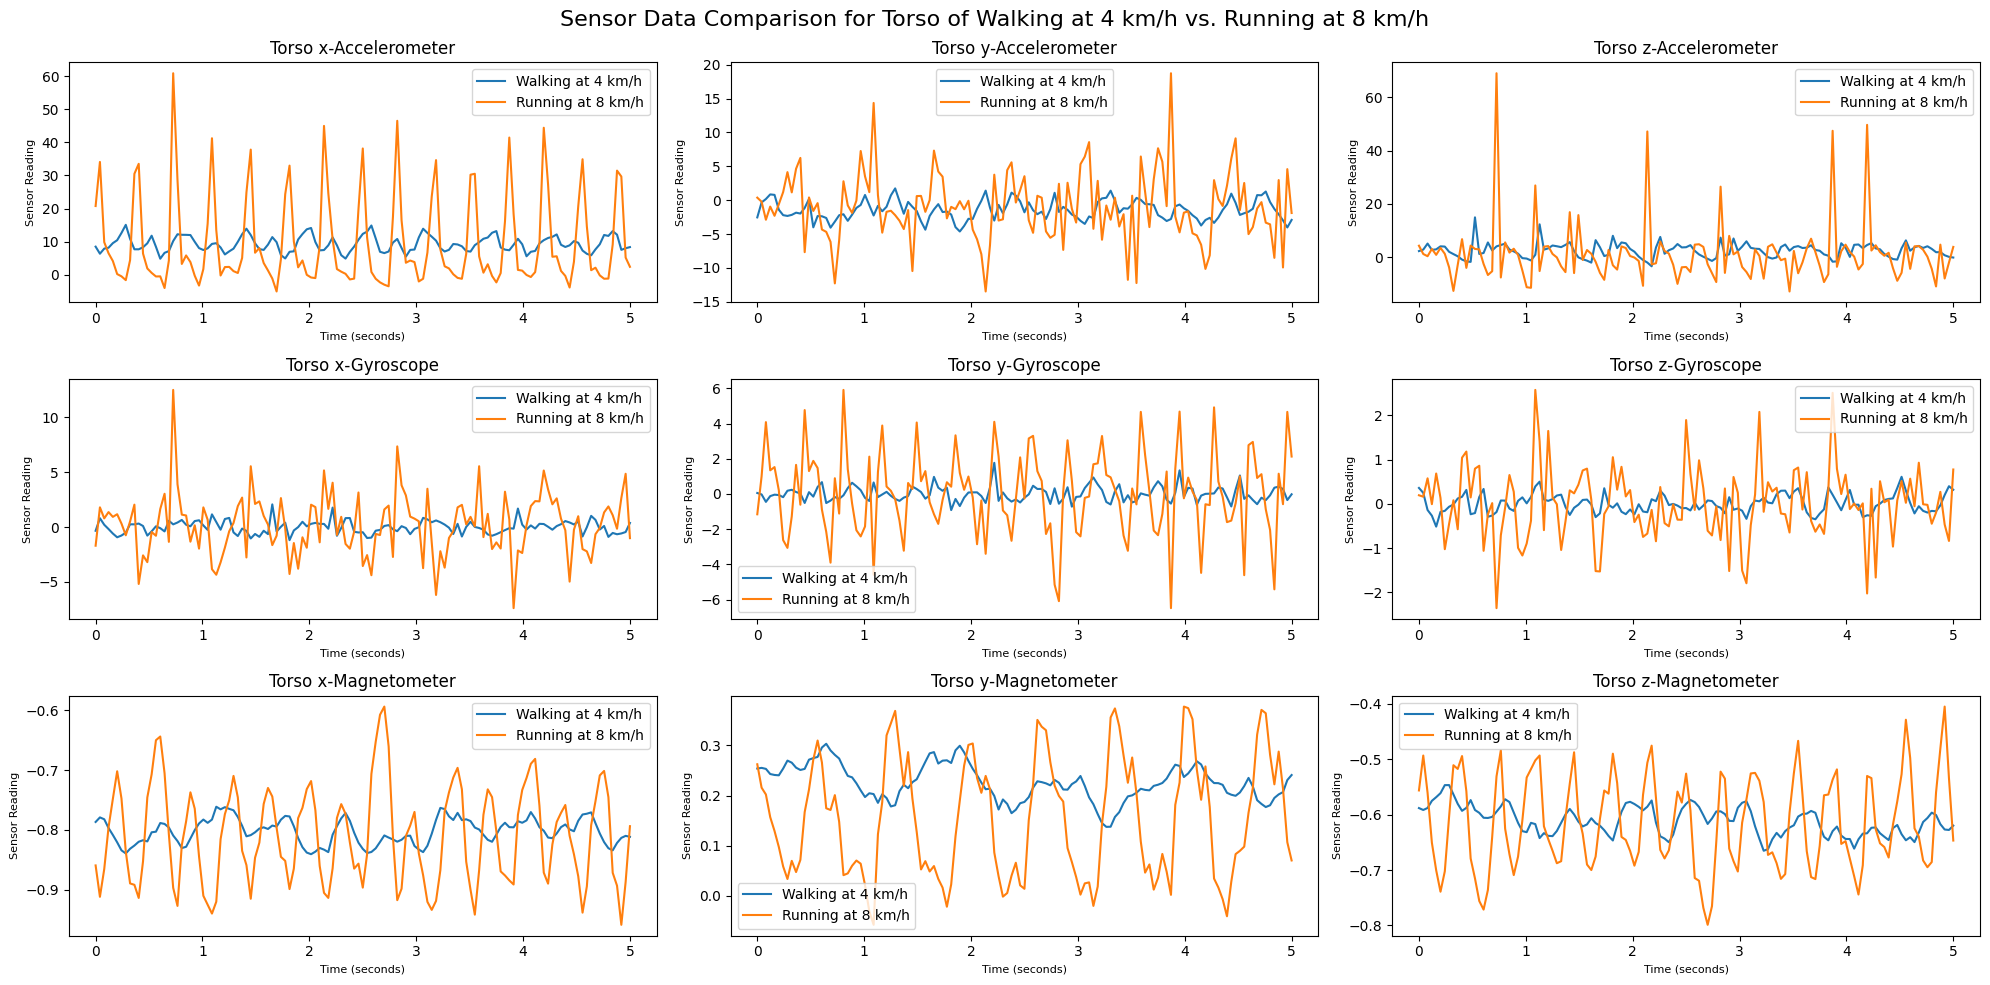

In [8]:
# Creating the comparison visualisation of the data for the torso
plot_activity_comparison(walking_data, "Walking at 4 km/h", running_data, "Running at 8 km/h", 'T')

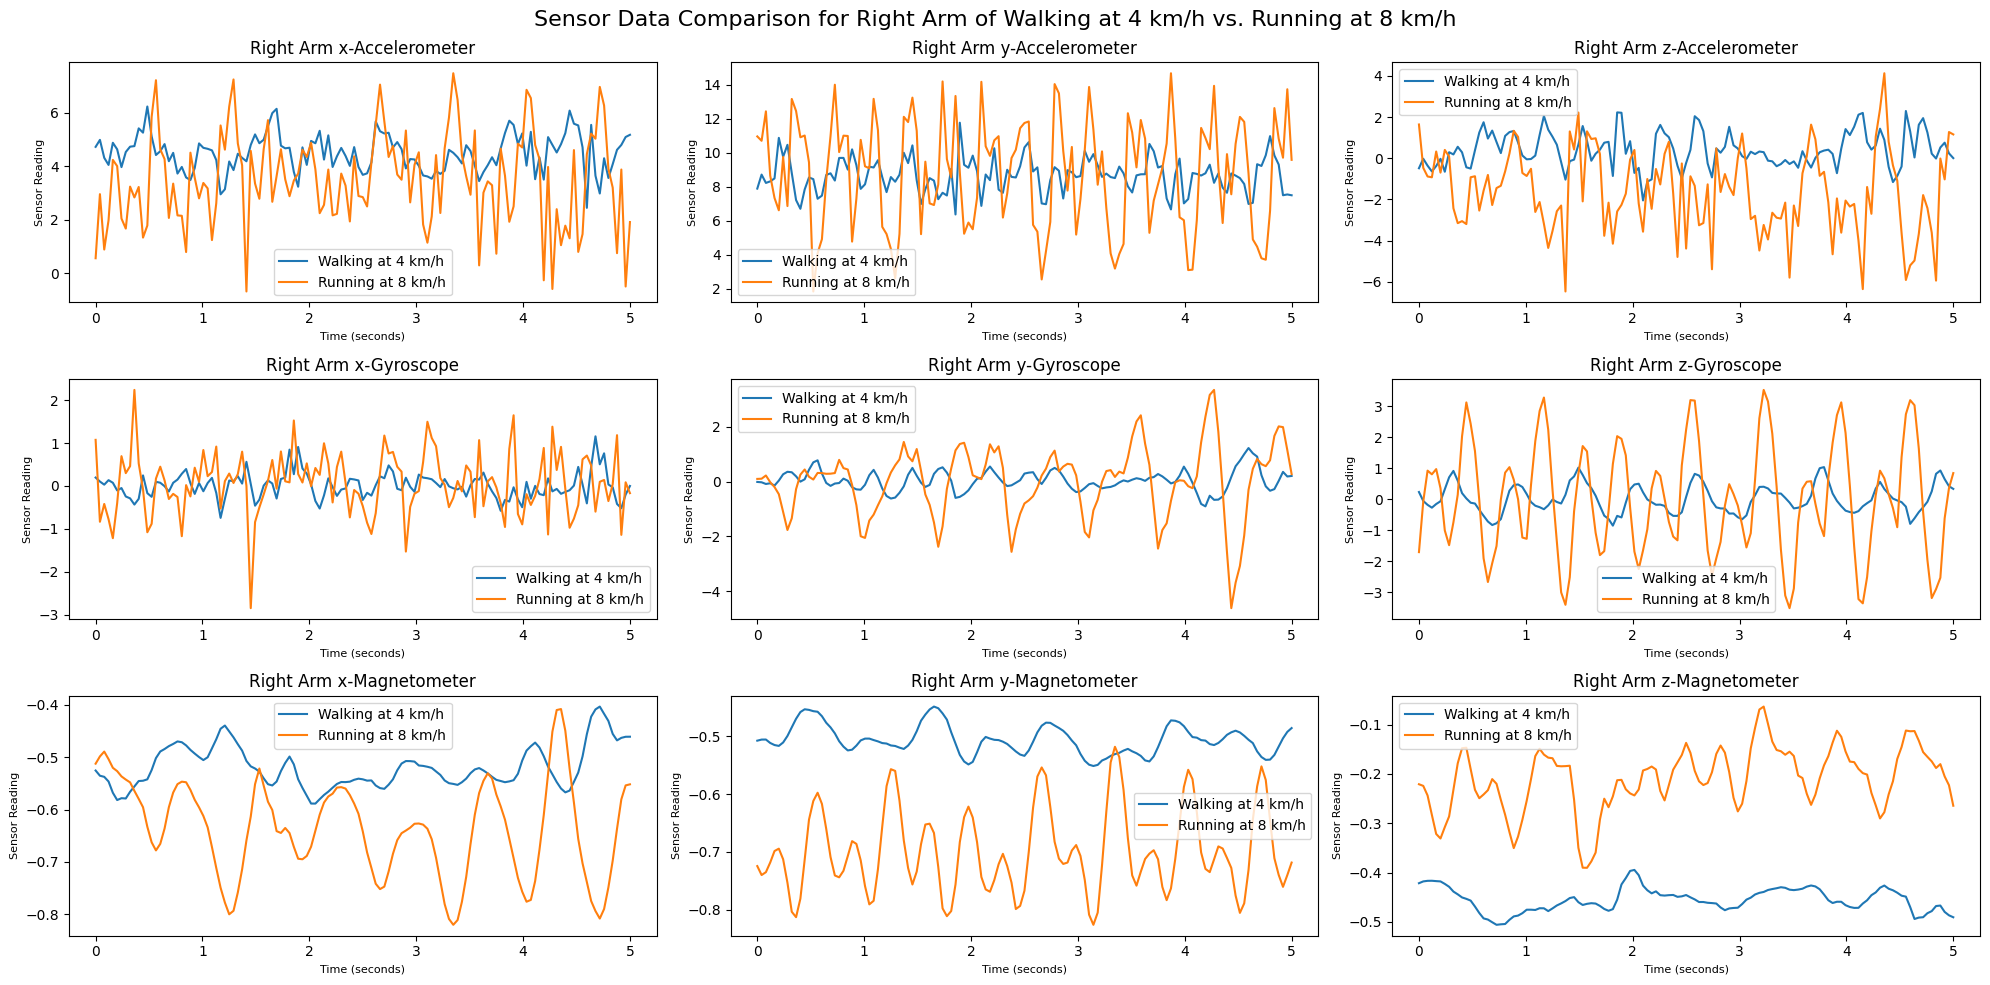

In [9]:
# Creating the comparison visualisation of the data for the Right Arm
plot_activity_comparison(walking_data, "Walking at 4 km/h", running_data, "Running at 8 km/h", 'RA')

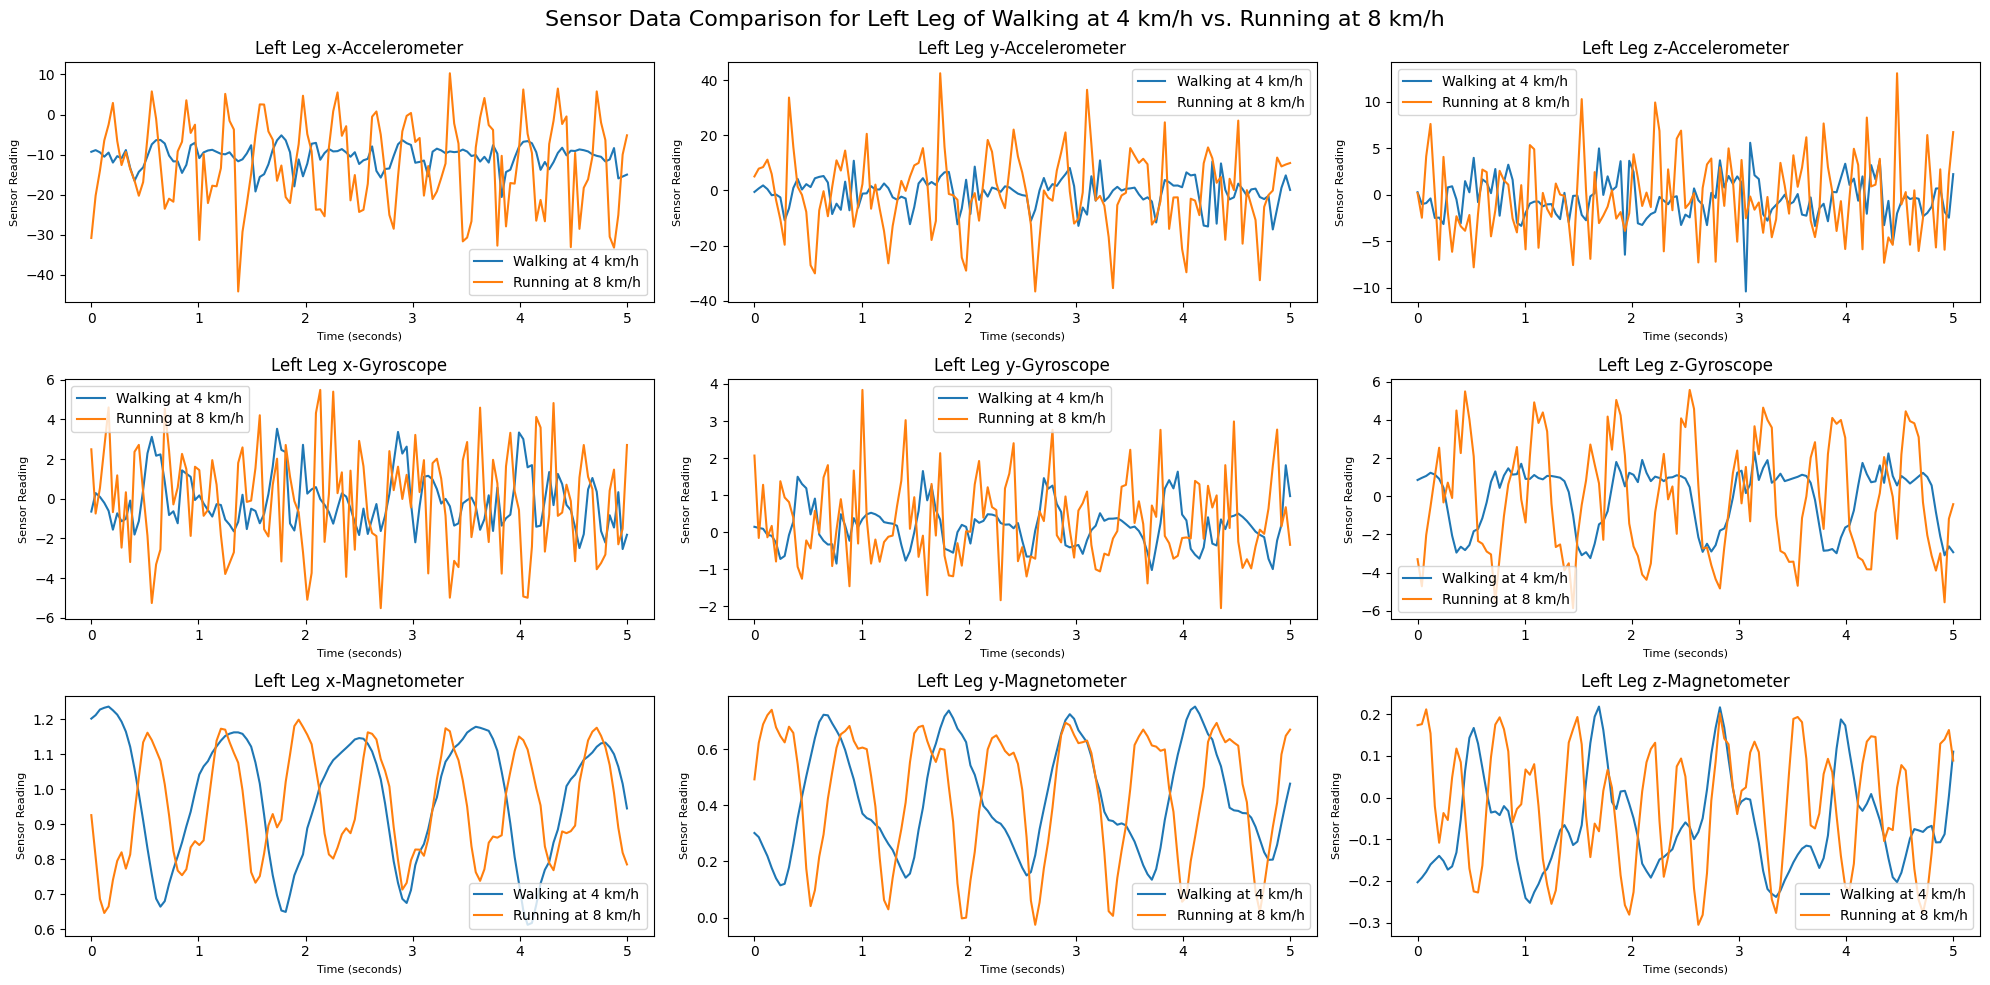

In [10]:
# Creating the comparison visualisation of the data for the Left Leg
plot_activity_comparison(walking_data, "Walking at 4 km/h", running_data, "Running at 8 km/h", 'LL')

### Exercise 1 Analysis of the visualized Results

**Analysis for the Torso-Data:**

For the torso the accelerometer data shows higher peaks during running than walking, especially on the x and z axes, visualizing, as expected with running, greater movement intensity. Also for the gyroscope readings the visualisation suggests more torso rotation as expected with a higher frequency and higher jumps in values and lastly also here is a higher fluctuation visible for all three axis.

**Analysis for the Arm-Data:**

Also the readings from the arms, here represented by the right arm, clearly show a higher activity in form of more frequent and more intense movements for the subject while running compared to walking.

**Analysis for the Leg-Data:**

Similarily for the leg data, again the accelerometer and gyroscope show a higher intensity and frequency for running compared to walking, while in contrast the magnetometer only only really shows a difference in frequency in the x-axis the walking posses higher variation in sensor reading, which my correspond to doing larger steps while walking compared to running.

**Conclusion**


Therefore concluding, the data is definitely able to represent the difference between these two physical activity of running on a treadmill at 8 km/h compared to walking at a pace of 4 km/h and as expected that running as the more physically demaning task also broadly shows a higher intensity and frequency in the data.




# Exercise 2



## Exercise 2 Instructions

Build a model (classifier) to predict the activity of a given subject. Decide on which features could be extracted from the data. For example:

- **mean, variance,skewness, and the kurtosis**. The distribution of each signal are approximately Normal. This means that we can take the first four statistical moments for each 5 second segment. By including the four moments, we are helping our models better learn the characteristic of each unique activity.
- n first values of the  the  [**autocorrelation**](https://en.wikipedia.org/wiki/Autocorrelation) sequence. In some time series analyses, such as in [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average), it is desirable to minimize autocorrelation so as to transform the series into a [stationary state](https://en.wikipedia.org/wiki/Stationary_process).
- n peaks of the [**discrete Fourier transform**](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
of a segment with the corresponding frequencies.

Consider normalising all features between [0,1] and reduce the dimension of features using [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).


We propose 2 approaches to create your train/testing set.

(1) Train and test sets that contain shuffled samples from each user. So the model will train on data from every user and predict the activities from every user in the test set.

(2) Seven user's data will be used as the training set and only one user's data as the test set. The goal here is to predict the activities of a user that the model has never seen before. How good is the model generalising the problem?

For each approach, consider the following building framework:
1. Split data into train and holdout sets
2. Optimize model hyperparameters
3. Cross Validate model's performance by analyze learning curves

Finally, consider the following evaluation metrics:

**Accuracy** represents how close or far off a given set of measurements are to their true value.

**Precision**: percentage of classifications predicted to be positive are actually positive. **Precision is a measure of the failure to correctly predict positive classifications. **

$$\textbf{Precision} = \frac{TP}{TP + FP}, $$

where TP refers to True Positives and FP to False Positives.

**Recall** describes how well the model can identify points that belong to the positive class. **Recall is a measure of the failure in distinguishing between positive and negative classifications. **

$$\textbf{Recall} = \frac{TP}{TP + FN},$$

where FN corresponds to False Negatives.

Finally, the $f_{1} score$ is a weighted average of precision and recall. The  $f_{1} score$  is used to get a measure of both types of failures.

**Note: Make comments on the code to discuss the results.**


## Exercise 2 Solution

### Data Preparation

In [7]:
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import acf

from tqdm import tqdm
# Sensor names
sensors = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
           "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
           "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
           "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
           "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]

# Initialize a list to store feature vectors
feature_vectors = []
n_autocorr = 2
final_df = pd.DataFrame()

for activity in tqdm(range(1, 20)):
    activity_folder = f'a{activity:02d}'
    for subject_id in range(1, 9):
        subject_folder = f'p{subject_id}'
        for segment in range(1, 61):
            segment_file = f's{segment:02d}.txt'
            file_path = os.path.join(base_path, activity_folder, subject_folder, segment_file)
            # Check if the file exists
            if os.path.exists(file_path):
                # Load the segment data
                data = pd.read_csv(file_path, header=None, names=sensors)
                features = [subject_id]
                for sensor in sensors:
                    sensor_data = data[sensor]
                    mean = np.mean(sensor_data)
                    variance = np.var(sensor_data)
                    skewness = skew(sensor_data)
                    kurt = kurtosis(sensor_data)
                    autocorr_values = acf(sensor_data, nlags=n_autocorr, fft=True)

                    features.extend([mean, variance, skewness, kurt])
                    features.extend(list(autocorr_values)[1:])

                # Append the features and the activity label to the feature_vectors list
                features.append(activity)  # Adding the activity label for reference
                feature_vectors.append(features)

                
final_column_names = ['subject_id']
for sensor in sensors:
    for stat in ['mean', 'variance', 'skewness', 'kurtosis']:
        final_column_names.append(f"{sensor}_{stat}")
    for i in range(1,n_autocorr+1):
        final_column_names.append(f"{sensor}_autocorr_{i}")
final_column_names.append('activity')

final_df = pd.DataFrame(feature_vectors, columns=final_column_names)


  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [03:15<00:00, 10.29s/it]


In [8]:
final_df

,subject_id,T_xacc_mean,T_xacc_variance,T_xacc_skewness,T_xacc_kurtosis,T_xacc_autocorr_1,T_xacc_autocorr_2,T_yacc_mean,T_yacc_variance,T_yacc_skewness,...,LL_ymag_kurtosis,LL_ymag_autocorr_1,LL_ymag_autocorr_2,LL_zmag_mean,LL_zmag_variance,LL_zmag_skewness,LL_zmag_kurtosis,LL_zmag_autocorr_1,LL_zmag_autocorr_2,activity
0,1,7.975714,0.014280,-0.023319,-1.019095,0.932910,0.900759,1.083150,0.002190,0.082260,...,-0.299003,-0.143913,0.052756,-0.057119,6.724493e-07,0.036729,-0.099989,-0.020713,0.062031,1
1,1,7.978250,0.007490,0.552416,-0.927828,0.866058,0.802512,1.140865,0.000777,-0.183415,...,0.149063,-0.039137,0.024759,-0.057268,6.976043e-07,0.347471,0.163469,0.044693,0.092689,1
2,1,7.970894,0.003067,0.100538,-0.917229,0.860135,0.780179,1.140962,0.000504,0.458858,...,-0.402729,-0.002241,0.063636,-0.057068,6.218076e-07,0.045579,-0.024409,-0.204083,0.095410,1
3,1,7.938412,0.003733,-0.231914,2.193103,0.523477,0.218112,1.165260,0.002155,0.218451,...,-0.315443,0.048460,0.142019,-0.056422,7.947155e-07,0.240690,-0.090456,0.394310,0.283541,1
4,1,7.908930,0.001728,2.042285,6.944206,0.620545,0.335270,1.187504,0.000657,-0.222607,...,0.121351,-0.070736,-0.006665,-0.055801,6.798595e-07,0.258429,0.024906,0.014016,-0.030763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8,8.280854,27.856157,1.350075,4.652970,0.693262,0.295972,-1.491537,14.552971,-0.065489,...,-1.258815,0.972219,0.926578,0.297666,4.102367e-02,-0.310022,-0.485352,0.978335,0.934071,19
9116,8,9.591118,35.436249,2.981144,19.211653,0.440210,0.156297,0.086304,5.287258,-0.713019,...,-1.024018,0.959599,0.873384,0.224716,3.328858e-02,-0.736410,0.331687,0.958205,0.902792,19
9117,8,9.599113,48.460079,0.449237,-0.715365,0.670595,0.089041,-0.728367,5.637557,-0.592675,...,-1.006077,0.978473,0.935407,-0.237786,2.009898e-02,0.668438,-0.356406,0.959339,0.893772,19
9118,8,9.692482,58.903309,4.491114,34.607587,0.420326,0.218804,-0.582724,4.129659,-0.902483,...,0.034480,0.966323,0.922329,0.533023,1.345528e-02,-1.482489,3.279057,0.909043,0.793529,19


### Feature Extraction (Approach 1)

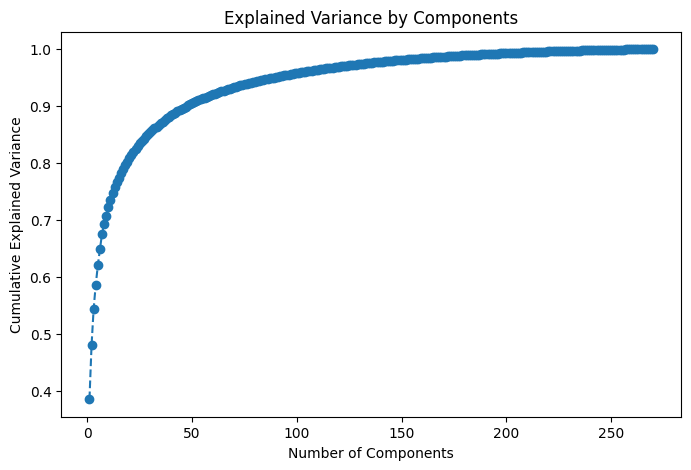

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['activity', 'subject_id'], axis=1)
y = final_df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

pca_test = PCA().fit(X_train_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca_test.explained_variance_ratio_) + 1), pca_test.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [8]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [38]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

def plot_learning_curve(classifier, classifier_name, X, y):
    plt.subplots(1,figsize=(10, 10))

    plt.title("Learning Curves for " + classifier_name)
    plt.xlabel("Size of Training Set")
    plt.ylabel("Accuracy Score")

    
    cv = StratifiedKFold(n_splits=5)
    train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=cv, train_sizes=np.linspace(.05, 1.0, 50), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="black", alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)
    
    plt.plot(train_sizes, train_scores_mean, '--', color="black", label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")
    plt.legend(loc="best")

    return plt


In [37]:
from sklearn.metrics import classification_report
def train_and_report(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report_dict = classification_report(y_test, y_pred,output_dict=True)

    for key in report_dict.keys():
        if key == 'accuracy':
            continue  
        report_dict[key].pop('support', None)  

    report_df = pd.DataFrame(report_dict).transpose()
    report_df.drop('support', errors='ignore', inplace=True)  
    print(report_df)
    return y_pred
    

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from seaborn import heatmap
from matplotlib.colors import Normalize

class CustomNorm(Normalize):
    def __call__(self, value, clip=None):
        return np.ma.masked_array(np.interp(value, [0, 3, 50, 80], [0, 0.2, 0.8, 1]))

def plot_confusion_matrix(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', norm=CustomNorm(), xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Activity')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

### Support Vector Machine (Approach 1)

In [12]:
from sklearn.svm import SVC


# Create a SVM classifier
svm_clf = SVC(random_state=42)
# Training and reporting for the model
y_pred = train_and_report(svm_clf, X_train_pca, y_train, X_test_pca, y_test)

              precision    recall  f1-score
1              1.000000  1.000000  1.000000
2              0.977011  0.977011  0.977011
3              1.000000  1.000000  1.000000
4              1.000000  1.000000  1.000000
5              1.000000  1.000000  1.000000
6              1.000000  1.000000  1.000000
7              0.937500  0.947368  0.942408
8              0.921348  0.942529  0.931818
9              1.000000  1.000000  1.000000
10             1.000000  1.000000  1.000000
11             1.000000  1.000000  1.000000
12             1.000000  1.000000  1.000000
13             1.000000  1.000000  1.000000
14             1.000000  1.000000  1.000000
15             1.000000  1.000000  1.000000
16             1.000000  1.000000  1.000000
17             1.000000  1.000000  1.000000
18             1.000000  1.000000  1.000000
19             1.000000  0.971698  0.985646
accuracy       0.991776  0.991776  0.991776
macro avg      0.991361  0.991506  0.991415
weighted avg   0.991897  0.99177

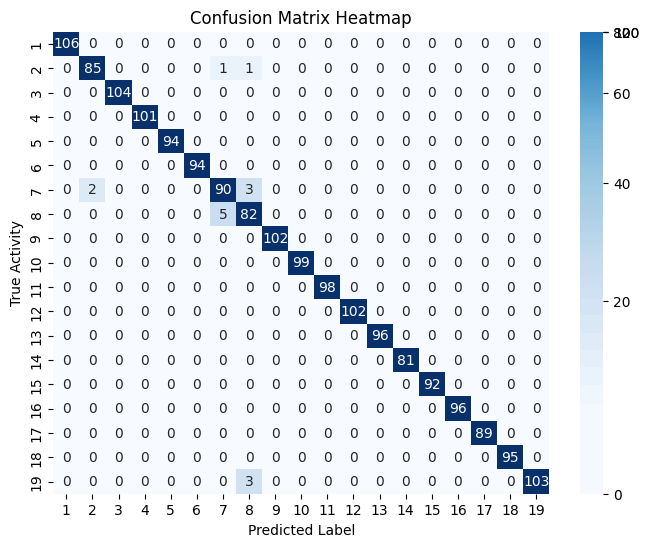

In [193]:
plot_confusion_matrix(y_pred, y_test)

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

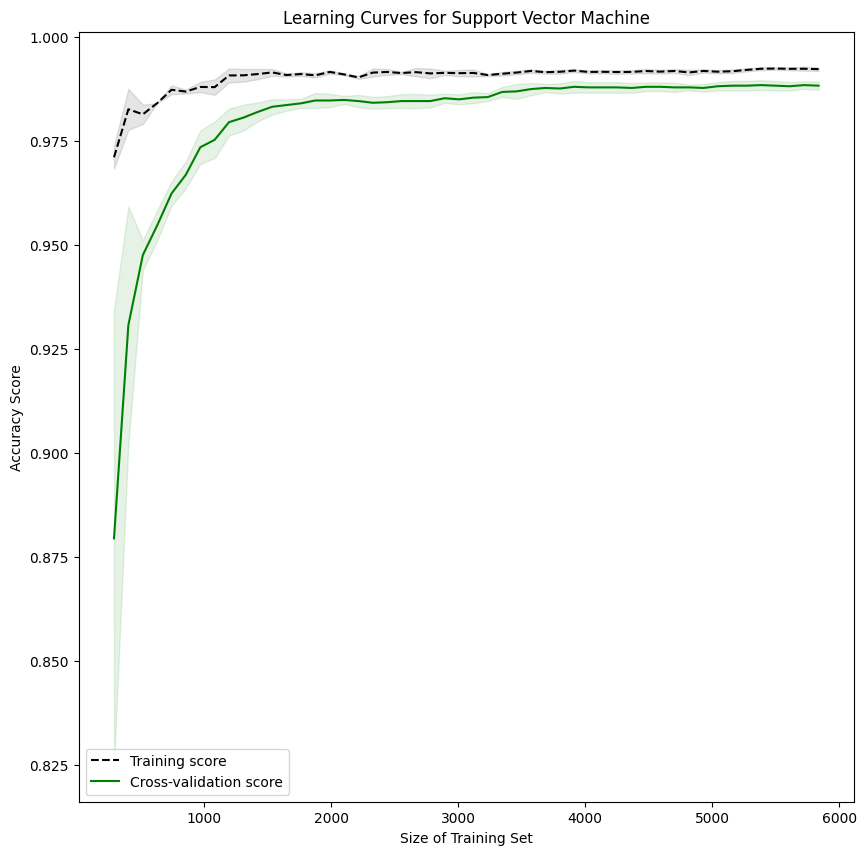

In [211]:
plot_learning_curve(svm_clf, "Support Vector Machine", X_train_pca, y_train)

### Random Forest Classifier  (Approach 1)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_pred = train_and_report(rf_clf, X_train_pca, y_train, X_test_pca, y_test)

              precision    recall  f1-score
1              1.000000  1.000000  1.000000
2              0.977528  1.000000  0.988636
3              1.000000  1.000000  1.000000
4              1.000000  1.000000  1.000000
5              1.000000  1.000000  1.000000
6              1.000000  1.000000  1.000000
7              0.946809  0.936842  0.941799
8              0.931818  0.942529  0.937143
9              1.000000  0.990196  0.995074
10             0.970588  1.000000  0.985075
11             1.000000  0.979592  0.989691
12             1.000000  1.000000  1.000000
13             1.000000  1.000000  1.000000
14             1.000000  1.000000  1.000000
15             1.000000  1.000000  1.000000
16             1.000000  1.000000  1.000000
17             1.000000  1.000000  1.000000
18             1.000000  1.000000  1.000000
19             1.000000  0.981132  0.990476
accuracy       0.991228  0.991228  0.991228
macro avg      0.990881  0.991068  0.990942
weighted avg   0.991309  0.99122

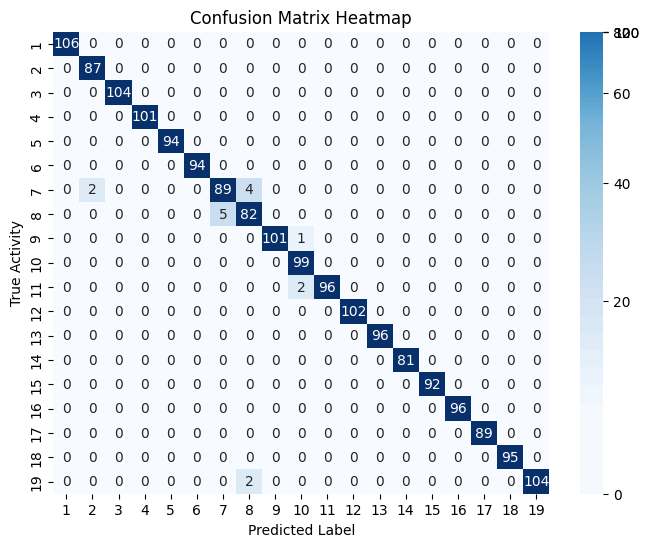

In [200]:
plot_confusion_matrix(y_pred, y_test)

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

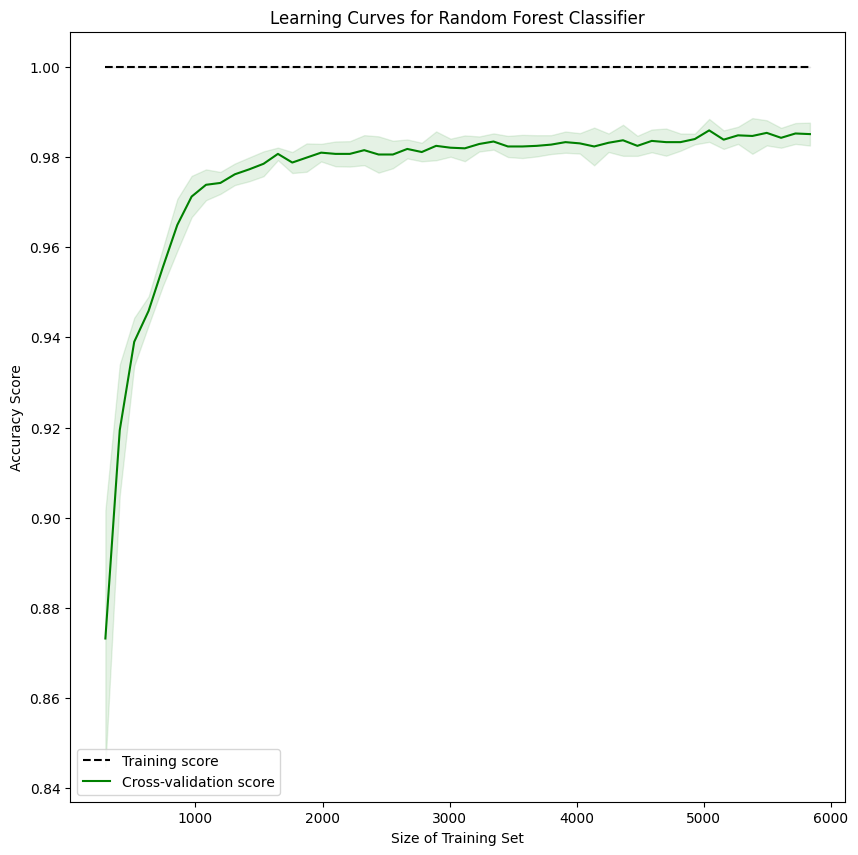

In [212]:
plot_learning_curve(rf_clf, "Random Forest Classifier", X_train_pca, y_train)

### XGBoost Classifier   (Approach 1)

In [14]:
import xgboost as xgb

xgboos_clf = xgb.XGBClassifier(random_state=42)
y_pred = train_and_report(xgboos_clf, X_train_pca, y_train-1, X_test_pca, y_test-1)

              precision    recall  f1-score
0              1.000000  1.000000  1.000000
1              0.977273  0.988506  0.982857
2              1.000000  1.000000  1.000000
3              1.000000  1.000000  1.000000
4              1.000000  0.989362  0.994652
5              0.989362  0.989362  0.989362
6              0.891089  0.947368  0.918367
7              0.917647  0.896552  0.906977
8              0.970874  0.980392  0.975610
9              0.951923  1.000000  0.975369
10             1.000000  0.969388  0.984456
11             0.990291  1.000000  0.995122
12             1.000000  0.979167  0.989474
13             1.000000  1.000000  1.000000
14             1.000000  1.000000  1.000000
15             1.000000  1.000000  1.000000
16             1.000000  1.000000  1.000000
17             0.989583  1.000000  0.994764
18             1.000000  0.933962  0.965854
accuracy       0.983004  0.983004  0.983004
macro avg      0.983055  0.982845  0.982782
weighted avg   0.983444  0.98300

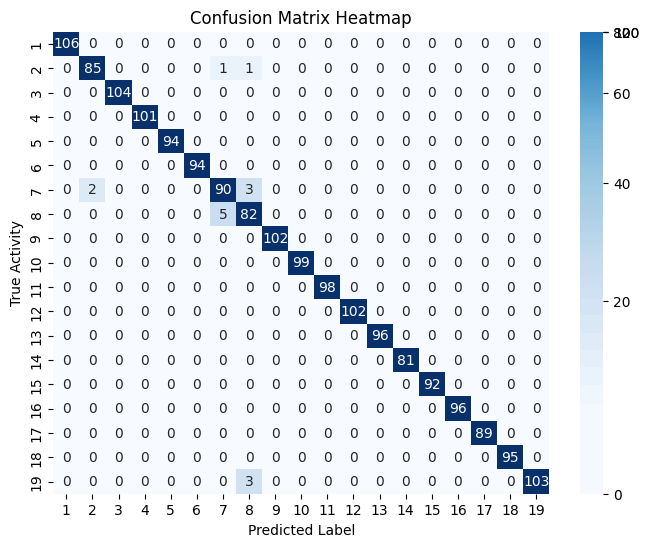

In [217]:
plot_confusion_matrix(y_pred, y_test)

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

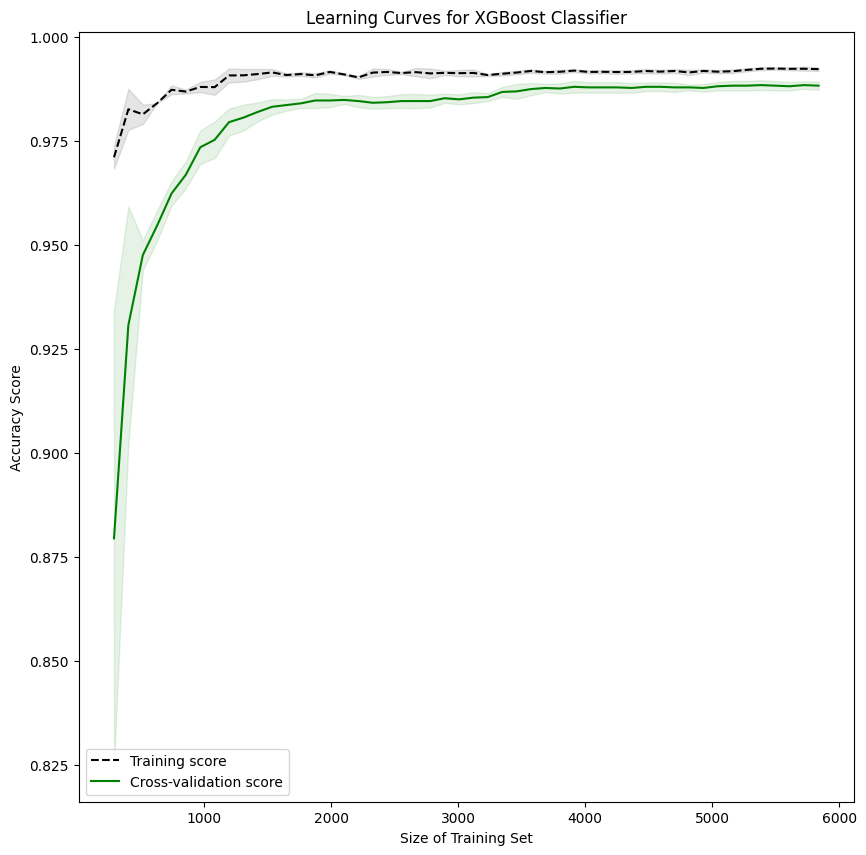

In [218]:
plot_learning_curve(svm_clf, "XGBoost Classifier", X_train_pca, y_train)

### Feature Extraction (Approach 2)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Splitting the data into training and testing data using user 8 as the test data as laid out in approach 2
train_2_df = final_df[final_df['subject_id'] != 8]
test_2_df = final_df[final_df['subject_id'] == 8]

X_2_train = train_2_df.drop(columns=['activity'], axis=1)
y_2_train = train_2_df['activity']

X_2_test = test_2_df.drop(columns=['activity'], axis=1)
y_2_test = test_2_df['activity']

X_2_train, y_2_train = shuffle(X_2_train, y_2_train, random_state=42) 


scaler = MinMaxScaler()
X_2_train_scaled = scaler.fit_transform(X_2_train)
X_2_test_scaled = scaler.transform(X_2_test)

pca = PCA(n_components=0.9)
X_2_train_pca = pca.fit_transform(X_2_train_scaled)
X_2_test_pca = pca.transform(X_2_test_scaled)

### Support Vector Machine (Approach 2)

In [34]:
from sklearn.svm import SVC

# Create a SVM classifier
svm_clf_2 = SVC(random_state=42)
# Training and reporting for the model
y_pred = train_and_report(svm_clf_2, X_2_train_pca, y_2_train, X_2_test_pca, y_2_test)


              precision    recall  f1-score
1              0.937500  1.000000  0.967742
2              0.742857  0.866667  0.800000
3              1.000000  1.000000  1.000000
4              1.000000  1.000000  1.000000
5              1.000000  1.000000  1.000000
6              1.000000  0.983333  0.991597
7              0.705882  0.800000  0.750000
8              0.457143  0.533333  0.492308
9              0.000000  0.000000  0.000000
10             0.625000  1.000000  0.769231
11             0.888889  0.800000  0.842105
12             1.000000  1.000000  1.000000
13             1.000000  1.000000  1.000000
14             1.000000  1.000000  1.000000
15             1.000000  1.000000  1.000000
16             1.000000  1.000000  1.000000
17             1.000000  1.000000  1.000000
18             1.000000  1.000000  1.000000
19             1.000000  0.983333  0.991597
accuracy       0.892982  0.892982  0.892982
macro avg      0.860909  0.892982  0.873925
weighted avg   0.860909  0.89298

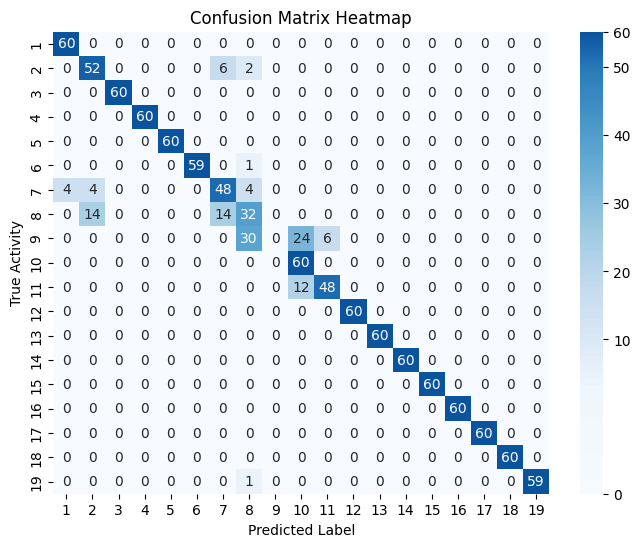

In [41]:
plot_confusion_matrix(y_pred, y_2_test)

### Random Forest Classifier  (Approach 2)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_2 = RandomForestClassifier(random_state=42)
y_pred = train_and_report(rf_clf_2, X_2_train_pca, y_2_train, X_2_test_pca, y_2_test)

              precision    recall  f1-score
1              0.681818  0.250000  0.365854
2              0.728571  0.850000  0.784615
3              0.566038  1.000000  0.722892
4              0.833333  1.000000  0.909091
5              0.867647  0.983333  0.921875
6              1.000000  0.983333  0.991597
7              0.666667  0.500000  0.571429
8              0.672727  0.616667  0.643478
9              1.000000  0.433333  0.604651
10             0.576923  1.000000  0.731707
11             0.736842  0.233333  0.354430
12             1.000000  1.000000  1.000000
13             0.731707  1.000000  0.845070
14             1.000000  0.983333  0.991597
15             0.937500  1.000000  0.967742
16             1.000000  0.783333  0.878505
17             1.000000  1.000000  1.000000
18             1.000000  1.000000  1.000000
19             0.951613  0.983333  0.967213
accuracy       0.821053  0.821053  0.821053
macro avg      0.839547  0.821053  0.802723
weighted avg   0.839547  0.82105

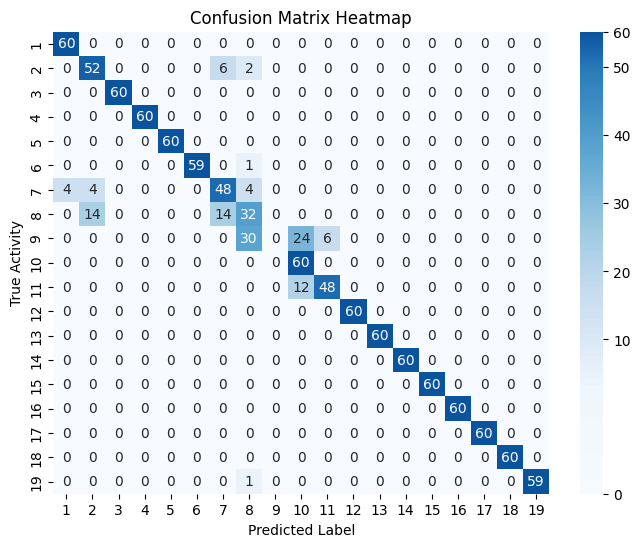

In [43]:
plot_confusion_matrix(y_pred, y_2_test)

### XGBoost Classifier   (Approach 2)

In [46]:
import xgboost as xgb

xgboos_clf_2 = xgb.XGBClassifier(random_state=42)
y_pred = train_and_report(xgboos_clf_2, X_2_train_pca, y_2_train-1, X_2_test_pca, y_2_test-1)

              precision    recall  f1-score
0              0.952381  0.333333  0.493827
1              0.743590  0.966667  0.840580
2              0.600000  1.000000  0.750000
3              0.895522  1.000000  0.944882
4              0.842857  0.983333  0.907692
5              0.983051  0.966667  0.974790
6              0.857143  0.400000  0.545455
7              0.791667  0.633333  0.703704
8              0.933333  0.466667  0.622222
9              0.467742  0.966667  0.630435
10             0.071429  0.016667  0.027027
11             1.000000  1.000000  1.000000
12             0.746835  0.983333  0.848921
13             0.983607  1.000000  0.991736
14             0.951613  0.983333  0.967213
15             0.980769  0.850000  0.910714
16             1.000000  1.000000  1.000000
17             0.967742  1.000000  0.983607
18             0.923077  1.000000  0.960000
accuracy       0.818421  0.818421  0.818421
macro avg      0.825914  0.818421  0.794884
weighted avg   0.825914  0.81842

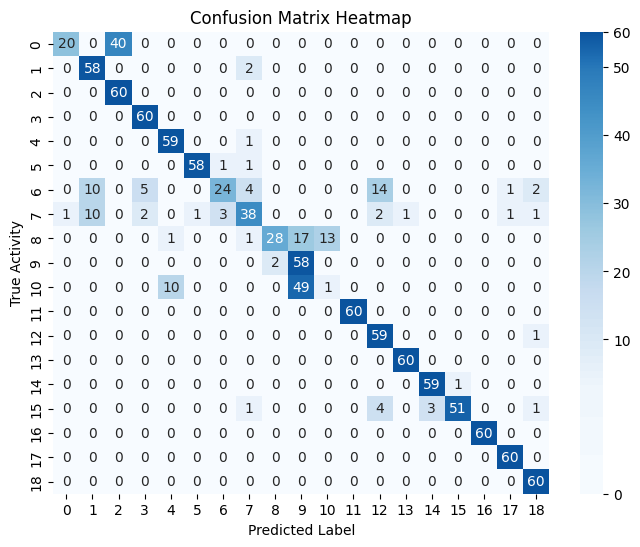

In [47]:
plot_confusion_matrix(y_pred, y_2_test-1)

### Discussion of the final Results for Exercise 2

**Results of Approach 1**

For the results of the first approach, we can conclude that the Support Vector Machine classifier performed the best with an accuracy of 0.991776, followed by the Random Forest Classifier with an accuracy of 0.991228 and lastly the XGBoost Classifier with an accuracy of 0.983004. The SVM also outperformed all the other classifiers in every single metric including the precision, recall and F1-Score. The Random Forest Classifier also performed very well closely following the SVM and the XGBoost Classifier also performed well, but not as well as the other two classifiers.

The following are exact test results for the different classifiers:


| Rank | Classifier  |   Accuracy   | Precision | Recall | F1-Score |
| --- | --- | --------- | --- | --- | --- |
| 1 | SVM  |  0.991776  | 0.991897   | 0.991776  | 0.991818  |
| 2 | RandomForrest  | 0.991228  | 0.991309 | 0.991228  | 0.991236  |
| 3 | XGBoost  | 0.983004    | 0.983444  | 0.983004  | 0.983050  |

Also, the analysis of the learning curves of the classifiers show quite a clear dominance of the Support Vector Machine, that already at around one ninth of the entire 9120 rows is able to reach an accuracy of 0.975 and also after the learning curve stabilizing with the higher training set size, the SVM still a very small standard deviation from its very good scores. This curve behavior is quite similar to that of the XGBoost Classifier, which also shows a consistent curve, with little spread and deviation to the end of the curve, which is quite useful, to know, that the model is not overfitting. The Random Forest Classifier on the other hand shows a more erratic curve, with a higher standard deviation, which can be a sign of a tendency to overfit, but since the accuracy is still higher that the XGBoost Classifier, it is still a very good classifier and probably preferable to the XGBoost as well.

Interestingly also looking at the confusion matrices all of the classifiers show a very similar pattern having the biggest of loss of accuracy in discerning between activity A7 and A8, which makes a lot of sense, since they are quite similar activities, with A7 being standing in an elevator still and A8 moving around in an elevator.

Concluding, the Support Vector Machine was able to prove itself through testing and validation to be the best classifier for this data, followed by the Random Forest Classifier and the XGBoost Classifier. The learning curves of the classifiers show that the SVM and XGBoost classifiers are not overfitting, while the Random Forest Classifier might be overfitting a bit, but still performs very well.


**Results of Approach 2**

To additionaly get the performance of the classifiers on a more generalizing level, I also tested the classifiers on a different approach, where the model is trained on data from seven users and tested on data from one user, exactly as laid out in the exercise description for approach 2. The results of this approach are as follows:

| Rank | Classifier  |   Accuracy   | Precision | Recall | F1-Score |
| --- | --- | --------- | --- | --- | --- |
| 1 | SVM  |  0.892982  | 0.860909   | 0.892982  | 0.873925 |
| 2 | RandomForrest  | 0.821053  | 0.839547 | 0.821053  | 0.802723  |
| 3 | XGBoost  | 0.818421    |  0.825914  | 0.818421 | 0.794884  |

As expected the results are not as good as in approach 1, but still the Support Vector Machine is the best classifier in the 4 metrics of Accuracy, Precision, Recall and F1-Score, followed by the Random Forest Classifier and then the XGBoost Classifier. So the SVM also proved itself in this context to be the best classifier for this data.  Interestingly though after analysing the confusion matrix of the SVM for the second approach it interestingly has a quite clear blind spot for the activity 9, besides that it is still able to outperform the other classifiers for the other activities quite clearly.

**Conclusion**

Summarizing the results we can definitely see, that the SVM lends itself the best for the tested classifier approaches and has especially for the first approach very reliable results of around 99% and up, with only very slight deviations around that value. The Random Forest Classifier also performed very well, but showed a tendency to overfitting, while the XGBoost Classifier also performed well, but not as well as the other two classifiers. For the second approach the results were not as good as for the first approach, but still the SVM was the best classifier, followed by the Random Forest Classifier and the XGBoost Classifier. The SVM also showed a blind spot for activity 9 in the second approach, but was still able to outperform the other classifiers for the other activities.